# Visualization for Ideal Fluid Motion
## Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

## Uniform Flow

In [2]:
v, θ, x, y, ψ, a, r= symbols('v, θ, x, y, ψ, a, r')
v1 = v*cos(θ)
v2 = v*sin(θ)
(v1, v2)

### Velocity Field (Vector Field)

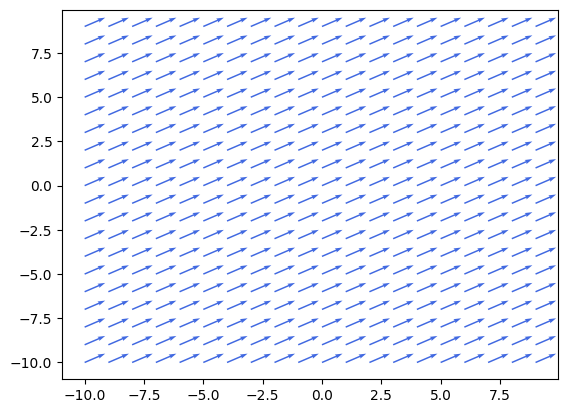

In [3]:
v1_p, v2_p = [lambdify([v, θ], v1, 'numpy'), lambdify([v, θ], v2, 'numpy')] 
t = 10
X, Y = np.meshgrid(range(-t,t),range(-t,t))
U, V = np.meshgrid(v1_p(1,np.pi/6), v2_p(1,np.pi/6))
plt.quiver(X,Y,U,V,scale=1, scale_units = 'xy', angles = 'xy', color = 'royalblue')

### Stream Line (Level Sets)

In [4]:
ψ = v*(cos(θ)*y-sin(θ)*x)
ψ

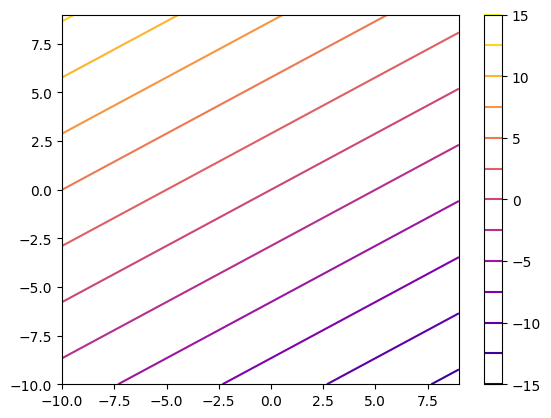

In [5]:
ψ_p = lambdify([v, θ, x, y], ψ, 'numpy')
Z = ψ_p(1, np.pi/6, X, Y)
plt.contour(X,Y,Z,levels=10,cmap = 'plasma')
plt.colorbar()

## Flow Around a Cylinder

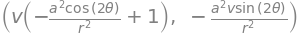

In [6]:
v1 = v*(1-(a**2*cos(2*θ))/r**2)
v2 = -v*(a**2*sin(2*θ))/r**2
(v1,v2)

### Velocity Field (Vector Field)

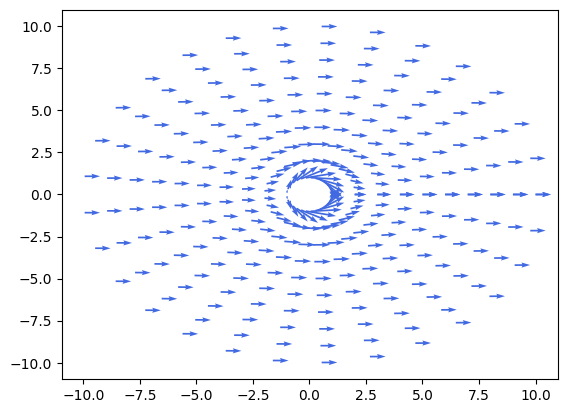

In [7]:
v1_p = lambdify([a,r,θ,v],v1,'numpy')
v2_p = lambdify([a,r,θ,v],v2,'numpy')

R, Θ = np.meshgrid(np.linspace(1,10,10),np.linspace(0,2*np.pi,30))
X, Y = R*np.cos(Θ), R*np.sin(Θ)

U, V = v1_p(1,R,Θ,1), v2_p(1,R,Θ,1)
plt.quiver(X,Y,U,V,color='royalblue')

In [8]:
ψ = v*(r-a**2/r)*sin(θ)
ψ

### Stream Line (Level Sets)

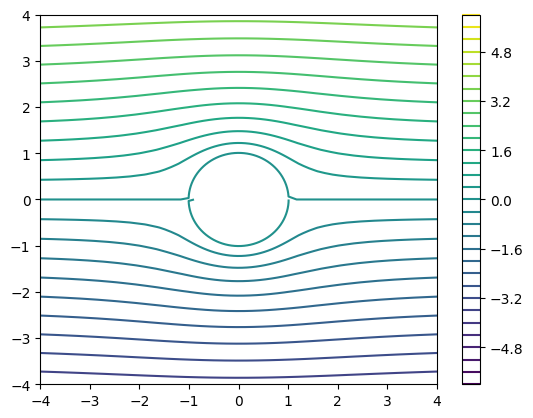

In [9]:
R, Θ = np.meshgrid(np.linspace(0.9,6,20),np.linspace(0,2*np.pi,100))
X, Y = R*np.cos(Θ), R*np.sin(Θ)

ψ_p = lambdify([r,θ,v,a],ψ,'numpy')
Z = ψ_p(R,Θ,1,1)
plt.contour(X,Y,Z,levels = 30)
plt.ylim([-4,4])
plt.xlim([-4,4])
plt.colorbar()